In [1]:
!pip install pandas matplotlib seaborn openpyxl

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from wordcloud import WordCloud

In [17]:
df = pd.read_excel('Reviews - FlightHub.xlsx')
#print(df.head())

In [46]:
# Function to extract negative value from JSON
def extract_negative_score(json_str):
    try:
        # Find the index of the value 'negative'
        start_index = json_str.find('"negative": ')
        if start_index == -1:
            return None

        # Extrair o valor de 'negative'
        start_index += len('"negative": ')
        end_index = json_str.find('\n', start_index)
        if end_index == -1:
            end_index = json_str.find('}', start_index)
        negative_value_str = json_str[start_index:end_index].strip()
        negative_value = float(negative_value_str)

        return negative_value
    except Exception as e:
        print(f"Erro ao extrair valor negativo: {e}")
        return None


# Apply the function and create a new column
df['Negative'] = df['Analyze sentiment'].apply(extract_negative_score)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

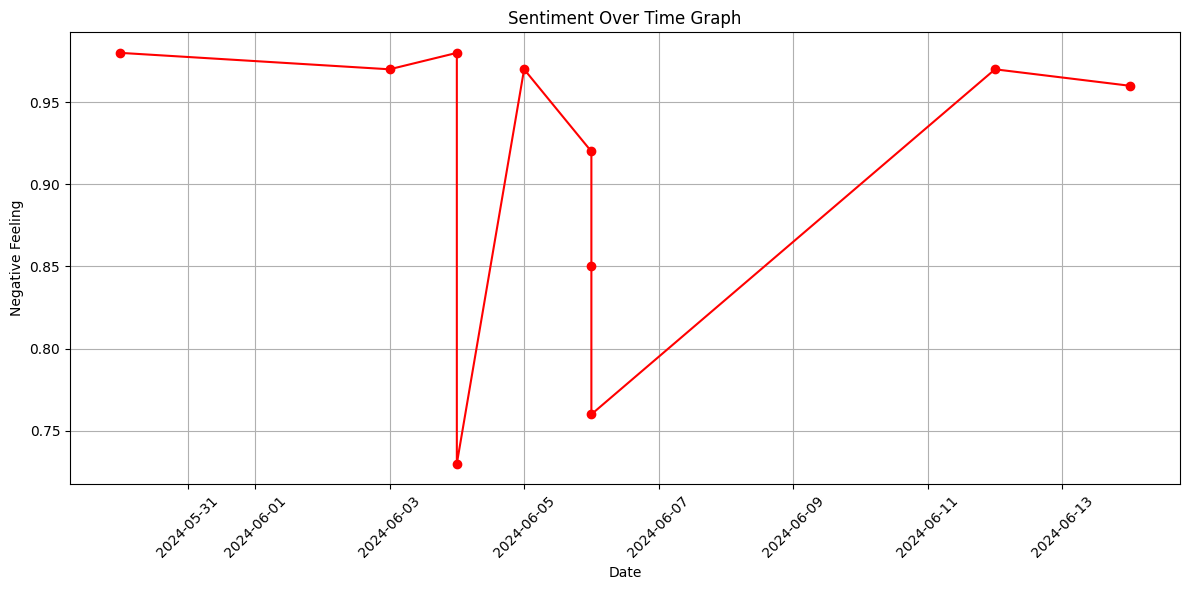

In [47]:
# Sentiment Over Time Graph
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Negative'], marker='o', color='red')
plt.title('Sentiment Over Time Graph')
plt.xlabel('Date')
plt.ylabel('Negative Feeling')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [48]:
# Function to extract keywords from JSON
def extract_key_phrases(json_str):
    try:
        data = json.loads(json_str)
        key_phrases = data.get('documents', [{}])[0].get('keyPhrases', [])
        return ' '.join(key_phrases)
    except json.JSONDecodeError as e:
        print(f"Erro ao decodificar JSON: {e}")
        return ''
    except Exception as e:
        print(f"Erro inesperado: {e}")
        return ''

# Apply the function to extract keywords
df['Cleaned Key Phrases'] = df['Key phrases'].apply(extract_key_phrases)

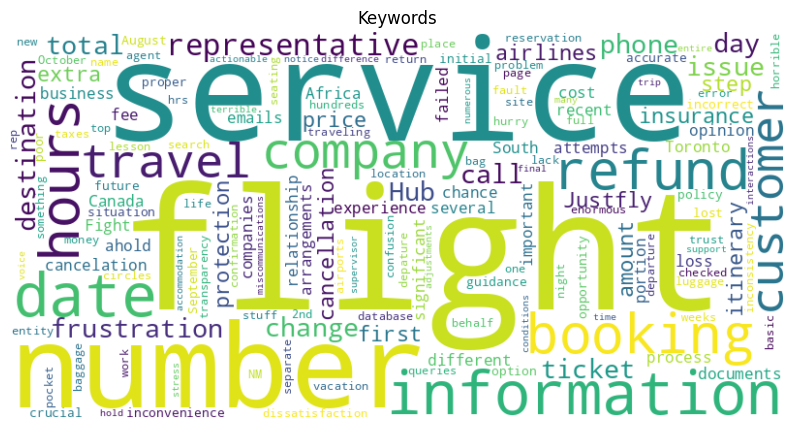

In [49]:
# Concatenate all keywords into a single string
all_key_phrases = ' '.join(df['Cleaned Key Phrases'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_key_phrases)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Keywords')
plt.show()
